<a href="https://colab.research.google.com/github/nivedha75/Columbia-Summer-Coursework/blob/master/BostonHousingClassificationChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/bostonhousing.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df['medv_binary'] = 0
df.loc[df['medv'] >= 22, 'medv_binary'] = 1

In [ ]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,medv_binary
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,1
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,1
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,1


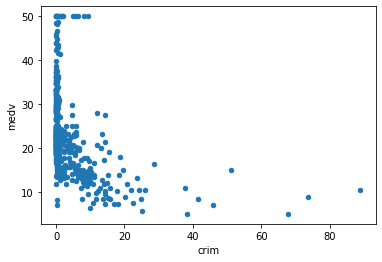

In [ ]:
df.plot(kind = 'scatter', x = 'crim', y = 'medv')
#df.corr().iloc[-2]
#index of outcome variable in brackets

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


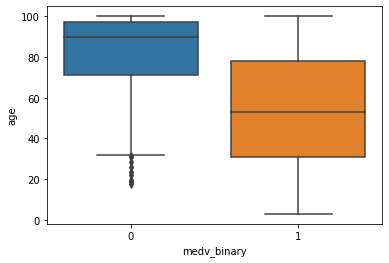

In [ ]:
import seaborn as sns

sns.boxplot(x='medv_binary', y="age", data=df)

In [ ]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaled = scaler.fit_transform(df[['ptratio', 'lstat', 'dis']])
 
 
df_scaled = pd.DataFrame(data=scaled, columns=['ptratio_scaled', 'lstat_scaled', 'dis_scaled', 'dis_scaled'])
 
df = df.join(df_scaled)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
 
KNN = KNeighborsClassifier(n_neighbors=5)
 
X = df[['crim_scaled',
 'ptratio_scaled',
 'lstat_scaled', 'dis_scaled']]
y = df['medv_binary']
 
KNN.fit(X, y)
 
df['prediction'] = KNN.predict(X)
df[['medv_binary','prediction']].sample(20)
 

,medv_binary,prediction
30,0,0
458,0,0
480,1,0
432,0,1
482,1,1
86,1,0
160,1,1
490,0,0
172,1,0
91,1,1


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 
print(accuracy_score(df['medv_binary'],df['prediction']))
print(recall_score(df['medv_binary'],df['prediction'],average='macro'))
print(precision_score(df['medv_binary'],df['prediction'],average='macro'))
print(f1_score(df['medv_binary'],df['prediction'],average='macro'))

0.8952569169960475
0.8944949789541721
0.8942028985507247
0.8943453612105883


In [ ]:
from sklearn.linear_model import LogisticRegression
 
LogR = LogisticRegression()
 
X = df[['crim_scaled',
 'ptratio_scaled',
 'lstat_scaled', 'dis_scaled']]
y = df['medv_binary']
 
LogR.fit(X, y)
 
df['prediction'] = LogR.predict(X)
df[['medv_binary','prediction']].sample(20)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(df['medv_binary'],df['prediction']))
print(recall_score(df['medv_binary'],df['prediction'],average='macro'))
print(precision_score(df['medv_binary'],df['prediction'],average='macro'))
print(f1_score(df['medv_binary'],df['prediction'],average='macro'))

0.8715415019762845
0.8701858654012895
0.8704720434178972
0.8703254676996471
